In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
#set file paths and read in files
filepath = '../raw_data/MN_walkability.csv'
statepath = '../raw_data/state_and_county_fips_master.csv'
healthpath = '../raw_data/MN_health_data.csv'
minnesota = pd.read_csv(filepath)
states = pd.read_csv(statepath)
health = pd.read_csv(healthpath)
health.head()

,fips,State,County,Unreliable,Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Z-Score,YPLL Rate (AIAN),...,% Drive Alone (Hispanic) 95% CI - Low,% Drive Alone (Hispanic) 95% CI - High,% Drive Alone (white),% Drive Alone (white) 95% CI - Low,% Drive Alone (white) 95% CI - High,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.19,95% CI - High.19,Z-Score.34
0,27000,Minnesota,NaN,NaN,55372.0,5586.0,5515.0,5657.0,NaN,21423.0,...,66.0,68.0,78.0,78.0,78.0,2903106,31,31,32,NaN
1,27001,Minnesota,Aitkin,NaN,277.0,7625.0,5759.0,9490.0,0.75,NaN,...,NaN,NaN,NaN,NaN,NaN,6248,34,31,37,0.54
2,27003,Minnesota,Anoka,NaN,3321.0,5460.0,5178.0,5742.0,-0.47,14440.0,...,60.0,77.0,79.0,78.0,80.0,188439,43,41,44,1.39
3,27005,Minnesota,Becker,NaN,494.0,7566.0,6472.0,8659.0,0.72,21914.0,...,NaN,NaN,79.0,76.0,81.0,16095,25,23,26,-0.33
4,27007,Minnesota,Beltrami,NaN,627.0,10589.0,9461.0,11716.0,2.42,26004.0,...,53.0,85.0,78.0,75.0,80.0,21098,19,17,22,-0.85


In [3]:

#add leading 0's for counties
minnesota['COUNTYFP'] = minnesota['COUNTYFP'].astype(str)
minnesota['STATEFP'] = minnesota['STATEFP'].astype(str)
minnesota['COUNTYFP'] = minnesota['COUNTYFP'].str.zfill(3)

#concatenate state and county codes
minnesota['fips'] = minnesota['STATEFP'] + minnesota['COUNTYFP']
minnesota['fips'] = minnesota['fips'].astype('int64')
minnesota.head(10)

,Unnamed: 0,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,...,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,fips
0,125050,125051,2.716310e+11,2.716310e+11,27,163,71003,1,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,18,15,8,1,8.500000,12371.721880,4.274573e+06,27163
1,125051,125052,2.716310e+11,2.716310e+11,27,163,71003,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,18,16,7,1,8.333333,7746.443532,2.872370e+06,27163
2,125052,125053,2.716310e+11,2.716310e+11,27,163,71003,3,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,15,6,9,1,6.833333,9884.396703,2.854760e+06,27163
3,125053,125054,2.716310e+11,2.716310e+11,27,163,71006,1,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,20,20,20,1,13.666667,7814.948545,3.005446e+06,27163
4,125054,125055,2.716310e+11,2.716310e+11,27,163,71006,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,20,18,18,1,12.666667,10906.431880,3.546875e+06,27163
5,125055,125056,2.713110e+11,2.713110e+11,27,131,70800,5,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,11,5,16,1,8.333333,3945.373100,4.936691e+05,27131
6,125056,125057,2.714500e+11,2.714500e+11,27,145,601,1,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,15,20,18,1,12.166667,3645.290542,5.845590e+05,27145
7,125057,125058,2.703710e+11,2.703710e+11,27,037,60904,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,20,20,12,1,11.000000,7146.198431,2.405088e+06,27037
8,125058,125059,2.703710e+11,2.703710e+11,27,037,60604,2,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,7,18,10,1,7.833333,7165.978041,2.552602e+06,27037
9,125059,125060,2.703710e+11,2.703710e+11,27,037,60817,4,378.0,"Minneapolis-St. Paul, MN-WI",...,-99999.0,-99999.0,4,11,12,1,6.833333,8984.860085,4.239370e+06,27037


In [4]:
#merge main dataset with fips codes dataset
merged_df = pd.merge(minnesota,states,on='fips')

#Choose with columns you want to view (feel free to add more!)
reduced_columns = merged_df[['GEOID20','CSA_Name','name','state','TotPop','NatWalkInd','fips']]
reduced_columns.head(20)

,GEOID20,CSA_Name,name,state,TotPop,NatWalkInd,fips
0,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1934,8.500000,27163
1,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,574,8.333333,27163
2,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,998,6.833333,27163
3,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,2506,13.666667,27163
4,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,2350,12.666667,27163
5,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,953,9.500000,27163
6,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,860,5.166667,27163
7,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1918,5.333333,27163
8,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1470,12.666667,27163
9,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1016,10.500000,27163


In [5]:
#add buckets for walkability

for index,row in reduced_columns.iterrows():
    if reduced_columns.loc[index, "NatWalkInd"] <= 5.75:
        reduced_columns.loc[index,'Walkability_bucket'] = 'Least Walkable'
    elif reduced_columns.loc[index, "NatWalkInd"] <= 10.5:
        reduced_columns.loc[index,'Walkability_bucket'] ='Below Average Walkability'
    elif reduced_columns.loc[index, "NatWalkInd"] <= 15.25:
        reduced_columns.loc[index,'Walkability_bucket'] = 'Above Average Walkability'
    elif reduced_columns.loc[index, "NatWalkInd"] > 15.25:
        reduced_columns.loc[index,'Walkability_bucket'] = 'Most Walkable'
reduced_columns.head(20)  

/var/folders/06/cl4dcprx4mgfy2x504fmy4lw0000gn/T/ipykernel_88601/577720634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_columns.loc[index,'Walkability_bucket'] ='Below Average Walkability'


,GEOID20,CSA_Name,name,state,TotPop,NatWalkInd,fips,Walkability_bucket
0,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1934,8.500000,27163,Below Average Walkability
1,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,574,8.333333,27163,Below Average Walkability
2,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,998,6.833333,27163,Below Average Walkability
3,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,2506,13.666667,27163,Above Average Walkability
4,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,2350,12.666667,27163,Above Average Walkability
5,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,953,9.500000,27163,Below Average Walkability
6,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,860,5.166667,27163,Least Walkable
7,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1918,5.333333,27163,Least Walkable
8,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1470,12.666667,27163,Above Average Walkability
9,2.716310e+11,"Minneapolis-St. Paul, MN-WI",Washington County,MN,1016,10.500000,27163,Below Average Walkability


In [6]:
#Create a new weighted walking index based on county population
sums = reduced_columns.groupby(['fips']).sum()['TotPop']
County_sums = pd.DataFrame({'County Population':sums})
weighted_data = pd.merge(reduced_columns,County_sums,on='fips')

weighted_data['weights'] = weighted_data['TotPop'] / weighted_data['County Population']

weighted_data['weightsum'] = weighted_data['NatWalkInd'] * weighted_data['weights']
weighted_data.head()

weighted_index = pd.DataFrame({'Weighted Walk Index':weighted_data.groupby(['fips']).sum()['weightsum']})
weighted_index.sort_values('Weighted Walk Index',ascending=False)

,Weighted Walk Index
fips,
27123,12.959863
27053,12.202175
27027,10.431105
27037,9.804645
27137,9.133652
...,...
27077,4.956857
27153,4.929160
27087,4.867054


In [7]:
#merge weighted walking index with health anaylsis data
health_analysis = pd.merge(weighted_index,health,on='fips')
health_analysis = health_analysis[['County','State','Weighted Walk Index','fips','Average Number of Physically Unhealthy Days', 'Average Number of Mentally Unhealthy Days','Food Environment Index','% Physically Inactive','% Adults with Obesity']]
health_analysis.head()

,County,State,Weighted Walk Index,fips,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,Food Environment Index,% Physically Inactive,% Adults with Obesity
0,Aitkin,Minnesota,5.135647,27001,3.7,4.43,7.4,23.1,34
1,Anoka,Minnesota,8.824677,27003,3.1,3.78,9.1,21.0,35
2,Becker,Minnesota,5.837864,27005,3.6,4.29,7.8,23.5,34
3,Beltrami,Minnesota,6.016794,27007,4.1,4.59,6.8,23.1,35
4,Benton,Minnesota,6.928409,27009,3.4,4.17,8.3,23.0,37


## Walkability vs Physical Acitivty plot

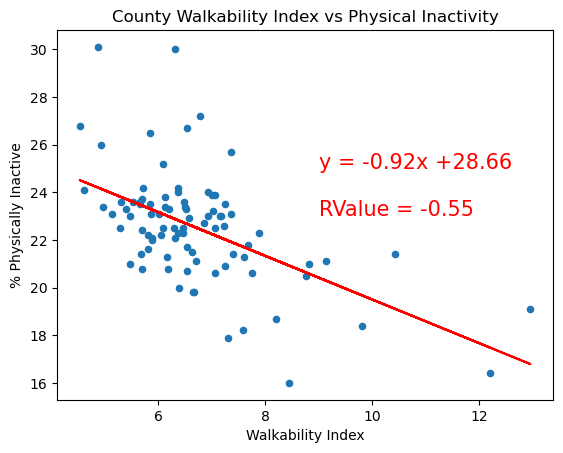

In [24]:
#Plot county data for walkability vs physical activity in a scatter plot
health_analysis.plot(kind='scatter',x='Weighted Walk Index',y='% Physically Inactive')
plt.xlabel("Walkability Index")
plt.title("County Walkability Index vs Physical Inactivity")


#Run regression and plot line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(health_analysis['Weighted Walk Index'],
                                                        health_analysis['% Physically Inactive'])
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
yvalues = health_analysis['Weighted Walk Index'] * slope + intercept
plt.plot(health_analysis['Weighted Walk Index'],yvalues,color='red')
plt.annotate(line,(9,25),fontsize=15,color="red")
plt.annotate("RValue = " + str(round(rvalue,2)),(9,23),fontsize=15,color="red")

plt.savefig("physical_activity.png")
plt.show()


In [9]:
print(f"R Value = {rvalue}")

R Value = -0.5461307184296875


## Walkability vs Mental Health plot

Moderate negative correlation. As average walking index per country increases, % of adults reporting being phsyically inavtive decreases.


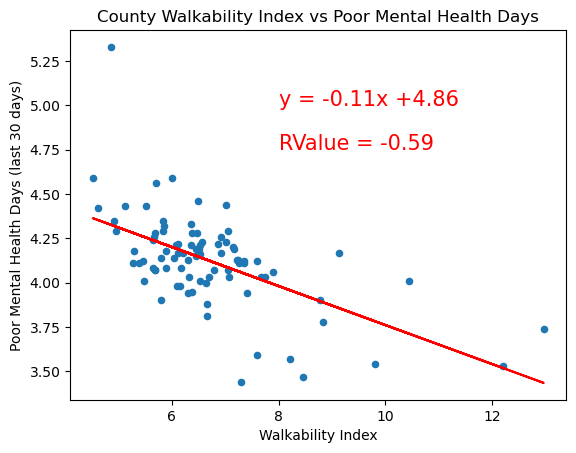

In [25]:
#Plot county data for walkability vs mental health
health_analysis.plot(kind='scatter',x='Weighted Walk Index',y='Average Number of Mentally Unhealthy Days')
plt.xlabel("Walkability Index")
plt.ylabel("Poor Mental Health Days (last 30 days)")
plt.title("County Walkability Index vs Poor Mental Health Days")

#Run regression and plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(health_analysis['Weighted Walk Index'],
                                                        health_analysis['Average Number of Mentally Unhealthy Days'])
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
yvalues = health_analysis['Weighted Walk Index'] * slope + intercept
plt.plot(health_analysis['Weighted Walk Index'],yvalues,color='red')
plt.annotate(line,(8,5),fontsize=15,color="red")
plt.annotate("RValue = " + str(round(rvalue,2)),(8,4.75),fontsize=15,color="red")

plt.savefig("Mental_health.png")
plt.show()


In [11]:
print(f"R Value = {rvalue}")

R Value = -0.5852985134932496


Moderate negative correlation. As average walking index per country increases, the average number of poor mental health days per month decreases.


## Walkability vs Food Environment

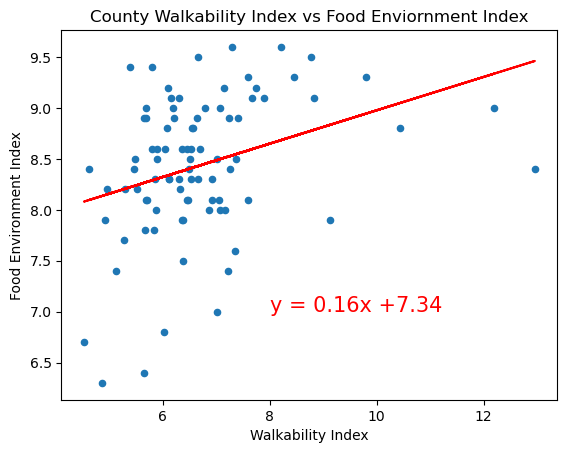

In [21]:
#Plot county data for walkability vs food environment
health_analysis.plot(kind='scatter',x='Weighted Walk Index',y='Food Environment Index')
plt.xlabel("Walkability Index")
plt.ylabel("Food Environment Index")
plt.title("County Walkability Index vs Food Enviornment Index")

#Run regression and plot the line
(slope, intercept, rvalue, pvalue, stderr) = linregress(health_analysis['Weighted Walk Index'],
                                                        health_analysis['Food Environment Index'])
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
yvalues = health_analysis['Weighted Walk Index'] * slope + intercept
plt.plot(health_analysis['Weighted Walk Index'],yvalues,color='red')
plt.annotate(line,(8,7),fontsize=15,color="red")
plt.annotate("RValue = " + str(round(rvalue,2)),(8,4.75),fontsize=15,color="red")


plt.savefig("Food Environment.png")
plt.show()


In [13]:
print(f"R Value = {rvalue}")

R Value = 0.3323394232307753


Weak positive correlation between Walkability and Food Environment Index.  

## Walkability vs Adult Obesity plot

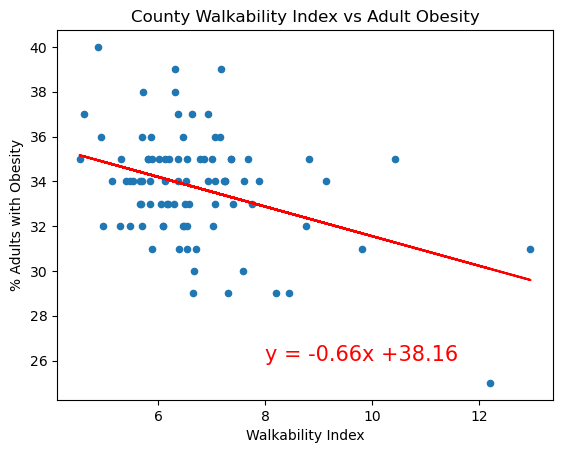

In [22]:
#Plot county data for walkability vs Adult obesity
health_analysis.plot(kind='scatter',x='Weighted Walk Index',y='% Adults with Obesity')
plt.xlabel("Walkability Index")
plt.ylabel("% Adults with Obesity")
plt.title("County Walkability Index vs Adult Obesity")

#Run the regression and plot the line
(slope, intercept, rvalue, pvalue, stderr) = linregress(health_analysis['Weighted Walk Index'],
                                                        health_analysis['% Adults with Obesity'])
line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
yvalues = health_analysis['Weighted Walk Index'] * slope + intercept
plt.plot(health_analysis['Weighted Walk Index'],yvalues,color='red')
plt.annotate(line,(8,26),fontsize=15,color="red")
plt.annotate("RValue = " + str(round(rvalue,2)),(8,4.75),fontsize=15,color="red")

plt.savefig("Adult Obesity.png")
plt.show()


In [16]:
print(f"R Value = {rvalue}")

R Value = -0.38019193659258776


Weak negative correlation between Walkability and adult obesity.